In [1]:
# For Dataset handling
import numpy as np
import pandas as pd

# For Checking Distribution Data
from scipy.stats import chisquare, kstest, normaltest

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("aug_train.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
#了解資料的比例關係
((df['target'].value_counts()/len(df))*100).round(2)

0.0    75.07
1.0    24.93
Name: target, dtype: float64

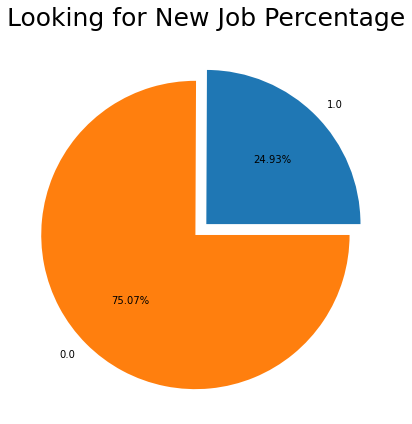

In [6]:
sizes = list(df['target'].value_counts().sort_values().values)
labels = list(df['target'].value_counts().sort_values().index)

explode = [0, 0.1]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, explode = explode,
        autopct=lambda p:f'{p:.2f}%')
plt.title('Looking for New Job Percentage', fontsize=25)
plt.tight_layout()
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

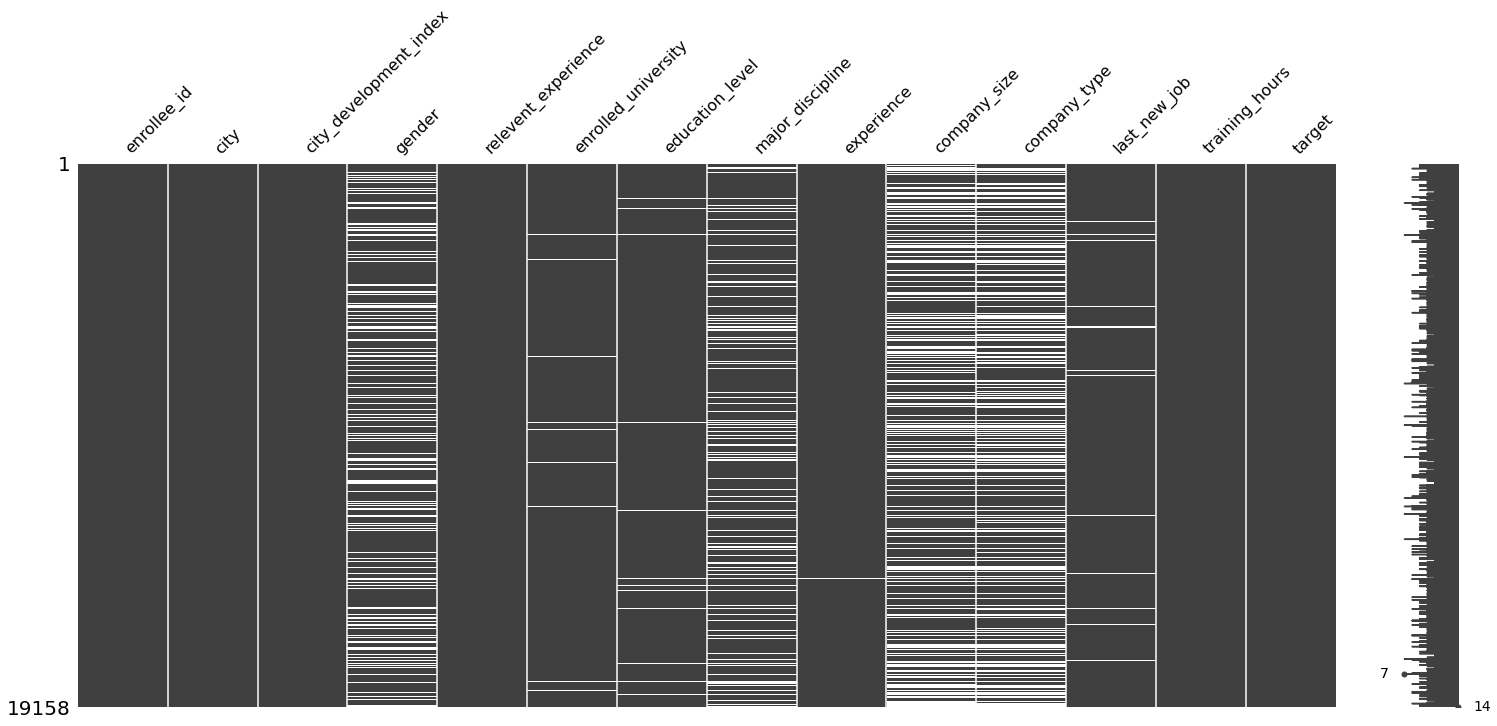

In [8]:
#透過視覺化找出遺缺值
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.show()

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [10]:
df.describe(include = 'object').T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


In [11]:
dataDesc= []

for i in df.columns:
    dataDesc.append([
        i, 
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) * 100),2),
        df[i].nunique(),
        df[i].sample(20).drop_duplicates().values
    ])
pd.DataFrame(dataDesc, columns=[
    "Data features", 
    "Data types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data features,Data types,Null,Null Percentage,Unique,Unique Sample
0,enrollee_id,int64,0,0.00,19158,"[3470, 21916, 16672, 4207, 33005, 17108, 3449,..."
1,city,object,0,0.00,123,"[city_143, city_103, city_16, city_21, city_45..."
2,city_development_index,float64,0,0.00,93,"[0.762, 0.843, 0.802, 0.92, 0.939, 0.897, 0.91..."
3,gender,object,4508,23.53,3,"[Male, Female, nan]"
4,relevent_experience,object,0,0.00,2,"[Has relevent experience, No relevent experience]"
5,enrolled_university,object,386,2.01,3,"[no_enrollment, Part time course, Full time co..."
6,education_level,object,460,2.40,5,"[Graduate, High School, Primary School, Masters]"
7,major_discipline,object,2813,14.68,6,"[STEM, nan, Business Degree, Arts, Humanities]"
8,experience,object,65,0.34,22,"[9, 7, <1, 5, 4, >20, 6, 10, 16, nan, 1, 12, 14]"
9,company_size,object,5938,30.99,8,"[10000+, nan, 50-99, 100-500, 10/49, 500-999]"


In [12]:
#資料清洗
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [13]:
for column in ['gender','enrolled_university','education_level','major_discipline', 'experience', 'company_size', 'company_type','last_new_job']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [14]:
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [15]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


In [16]:
df = df.drop(columns=["enrollee_id"])

In [17]:
#For Correlation Checking
import dython
from dython.nominal import associations, cramers_v, correlation_ratio, theils_u

In [18]:
# Crammers V
categorical = df.select_dtypes('object').columns.to_list()

assoc_cramers = []
for i in  categorical:
    assoc = round(cramers_v(df['target'], df[i]),2)
    assoc_cramers.append(assoc)

In [19]:
df_cramers_v = pd.DataFrame(data=[assoc_cramers], columns=categorical, index=['target'])

<AxesSubplot:>

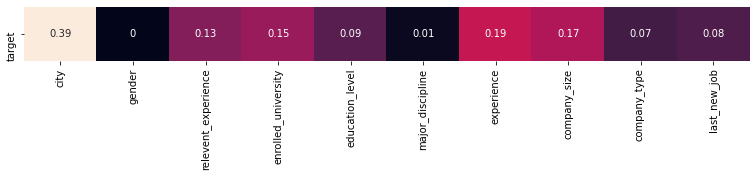

In [20]:
plt.figure(figsize = (13,1))
sns.heatmap(df_cramers_v, cbar = False, annot=True)

In [21]:
numerical = df.select_dtypes(['int64', 'float64']).columns.to_list()

assoc_corratio = []
for i in  numerical:
    assoc = round(correlation_ratio(df['target'], df[i]),2)
    assoc_corratio.append(assoc)

In [22]:
numerical

['city_development_index', 'training_hours', 'target']

In [23]:
df_corr_ratio = pd.DataFrame(data=[assoc_corratio], columns=numerical, index=['target'])

<AxesSubplot:>

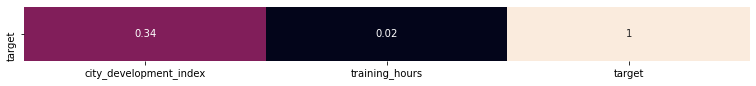

In [24]:
plt.figure(figsize = (13,1))
sns.heatmap(df_corr_ratio, cbar = False, annot=True)

In [25]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [26]:
df[df.duplicated()]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
250,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
3924,city_159,0.843,Male,Has relevent experience,no_enrollment,High School,STEM,>20,50-99,Pvt Ltd,>4,44,0.0
4078,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,91,0.0
4212,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,never,42,1.0
4271,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Pvt Ltd,>4,70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19019,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,13,1.0
19056,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,6,100-500,Pvt Ltd,1,44,0.0
19057,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,>4,56,1.0
19143,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,18,0.0


In [27]:
df.duplicated().sum()

97

In [28]:
df.drop_duplicates(keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19061 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19061 non-null  object 
 1   city_development_index  19061 non-null  float64
 2   gender                  19061 non-null  object 
 3   relevent_experience     19061 non-null  object 
 4   enrolled_university     19061 non-null  object 
 5   education_level         19061 non-null  object 
 6   major_discipline        19061 non-null  object 
 7   experience              19061 non-null  object 
 8   company_size            19061 non-null  object 
 9   company_type            19061 non-null  object 
 10  last_new_job            19061 non-null  object 
 11  training_hours          19061 non-null  int64  
 12  target                  19061 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB


In [29]:
#資料預處理和EDA

## 1. City

In [30]:
df['city'].nunique()

123

In [31]:
df['city'].value_counts()

city_103    4290
city_21     2689
city_16     1520
city_114    1335
city_160     841
            ... 
city_129       3
city_121       3
city_111       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64

In [32]:
df['city'] = df['city'].str.replace('city_','')

In [33]:
df['city'].value_counts()

103    4290
21     2689
16     1520
114    1335
160     841
       ... 
121       3
129       3
111       3
140       1
171       1
Name: city, Length: 123, dtype: int64

In [34]:
df['city'] = df['city'].astype('int64')

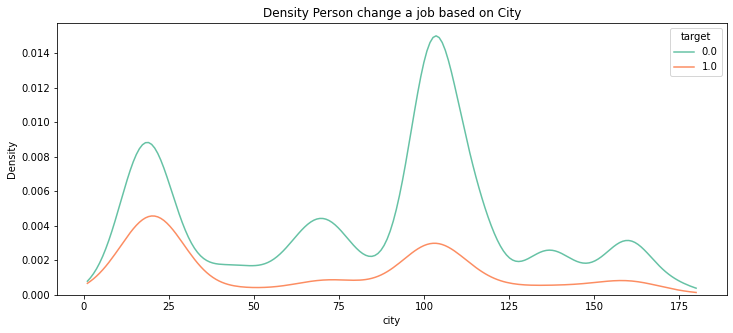

In [35]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df, x="city", hue="target",cut = 0,palette='Set2')
plt.title('Density Person change a job based on City')
plt.show()

從上面的 KDEPlot 我們可以觀察到數字在 20 - 30 之間的城市具有峰值密度

## 2.City Development Index

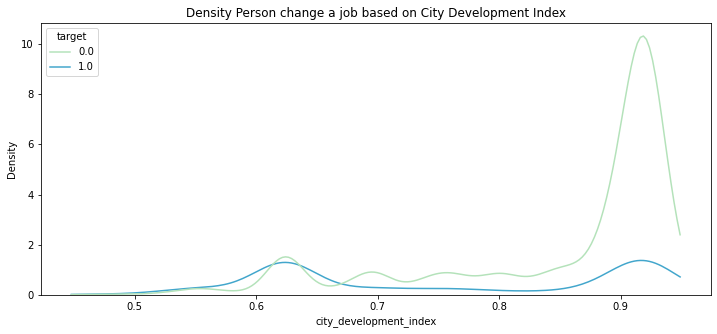

In [36]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df, x="city_development_index", hue="target",cut = 0,palette='GnBu')
plt.title('Density Person change a job based on City Development Index')
plt.show()

根據上面的 KDEPlot，發展指數較高的城市不太可能有想換工作的人

## 3. Gender

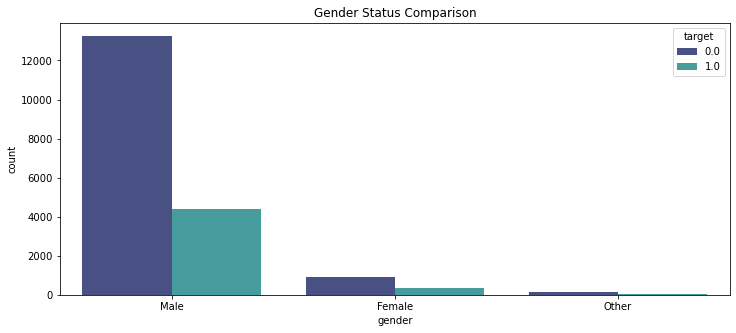

In [37]:
plt.figure(figsize=(12, 5))
sns.countplot(x=df["gender"],hue=df["target"], data=df, palette='mako')
plt.title('Gender Status Comparison')
plt.show()

In [38]:
Marital = ((pd.crosstab(index= df["gender"], columns= df["target"], normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

target,0.0,1.0
gender,,
Female,73.65,26.35
Other,73.82,26.18
Male,75.17,24.83


可以發現女性換工作的比例最高，顯示性別對改變工作決定沒有影響和相關性

## 4.Relevant Experience

In [39]:
df['relevent_experience'].value_counts()

Has relevent experience    13713
No relevent experience      5348
Name: relevent_experience, dtype: int64

In [40]:
df['relevent_experience'] = df['relevent_experience'].map({'Has relevent experience' : 1, 'No relevent experience' : 0})

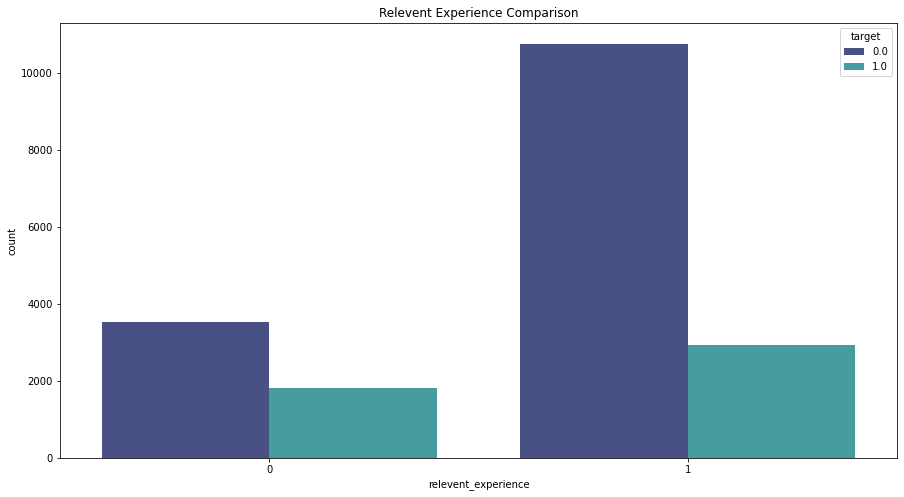

In [41]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df["relevent_experience"],hue=df["target"], data=df, palette='mako')
plt.title('Relevent Experience Comparison')
plt.show()

In [42]:
Marital = ((pd.crosstab(index= df["relevent_experience"], columns= df["target"], normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

target,0.0,1.0
relevent_experience,,
0,66.19,33.81
1,78.52,21.48


沒有數據科學經驗的人更有可能轉行成為數據科學家，佔所有接受培訓的人的 33%。

## 5.enrolled_university

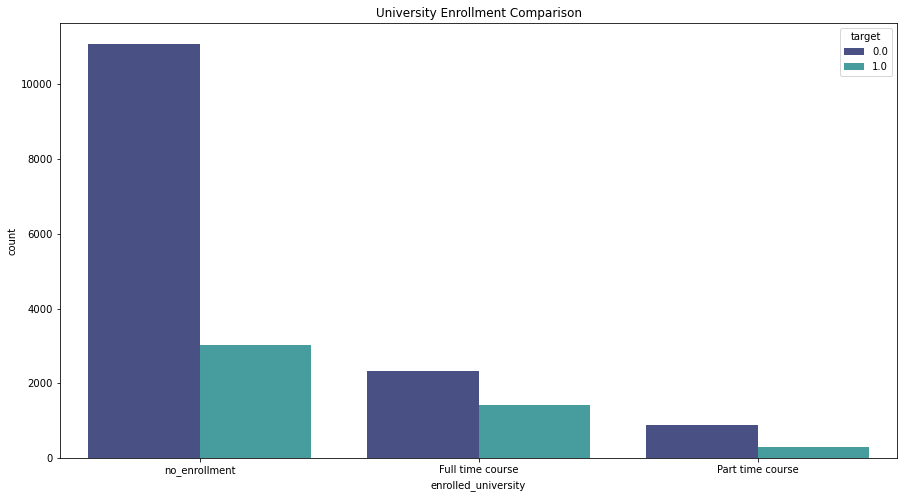

In [43]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df["enrolled_university"],hue=df["target"], data=df, palette='mako')
plt.title('University Enrollment Comparison')
plt.show()

In [44]:
Marital = ((pd.crosstab(index= df["enrolled_university"], columns= df["target"], normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

target,0.0,1.0
enrolled_university,,
Full time course,62.06,37.94
Part time course,74.79,25.21
no_enrollment,78.53,21.47


參加完整培訓的人是有意換工作的人，佔比37.94%

## 6.education_level

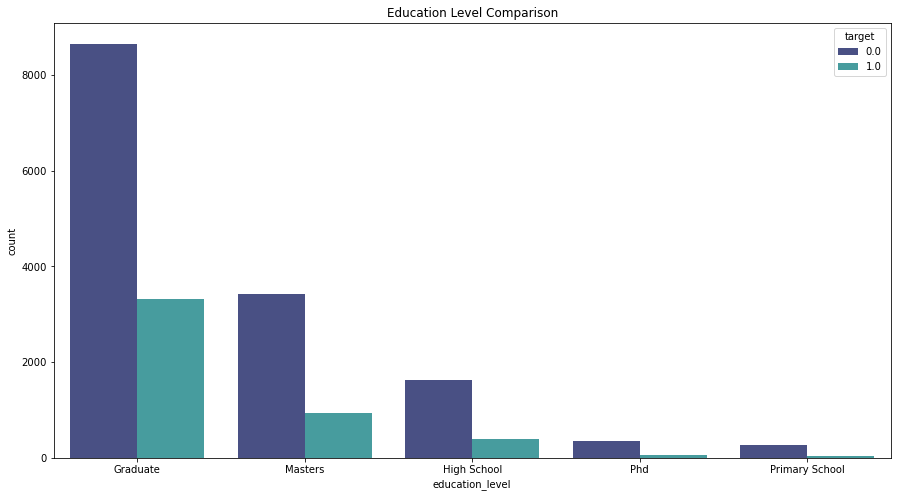

In [45]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df["education_level"],hue=df["target"], data=df, palette='mako')
plt.title('Education Level Comparison')
plt.show()

In [46]:
Marital = ((pd.crosstab(index= df["education_level"], columns= df["target"], normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

target,0.0,1.0
education_level,,
Graduate,72.21,27.79
Masters,78.54,21.46
High School,80.49,19.51
Phd,85.99,14.01
Primary School,86.56,13.44


大學畢業生是最想要換工作成為數據科學家的人

## 7.major_discipline

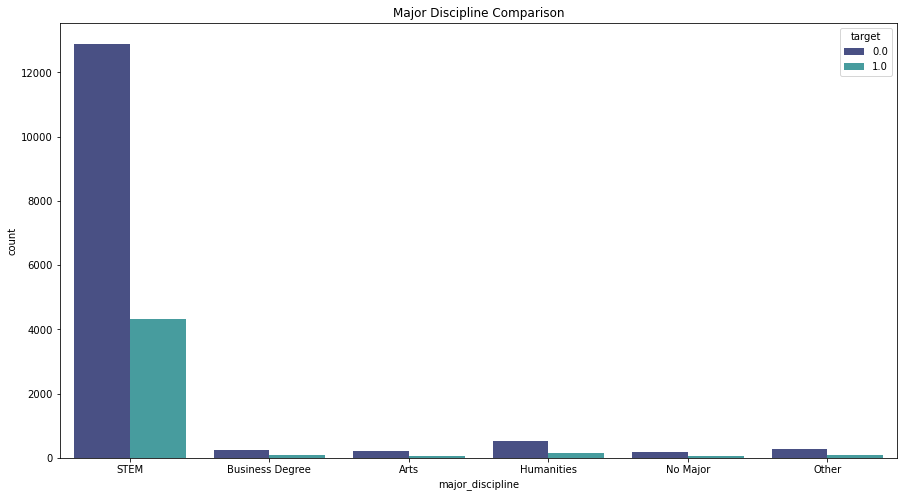

In [47]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df["major_discipline"],hue=df["target"], data=df, palette='mako')
plt.title('Major Discipline Comparison')
plt.show()

In [48]:
Marital = ((pd.crosstab(index= df["major_discipline"], columns= df["target"], normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

target,0.0,1.0
major_discipline,,
Other,73.23,26.77
Business Degree,73.70,26.30
STEM,74.91,25.09
No Major,75.34,24.66
Humanities,78.92,21.08
Arts,79.05,20.95


可以發現想要換工作的人與教育專業學科沒有關係。

## 8.experience

In [49]:
df['experience'].value_counts()

>20    3297
5      1425
4      1400
3      1348
6      1213
2      1124
7      1025
10      981
9       978
8       800
15      683
11      664
14      586
1       548
<1      519
16      505
12      492
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [50]:
df['experience'] =  df['experience'].replace({'<1' : '0','>20': '21'})

In [51]:
df['experience'].value_counts()

21    3297
5     1425
4     1400
3     1348
6     1213
2     1124
7     1025
10     981
9      978
8      800
15     683
11     664
14     586
1      548
0      519
16     505
12     492
13     399
17     342
19     304
18     280
20     148
Name: experience, dtype: int64

In [52]:
df['experience'] = df['experience'].astype('int64')

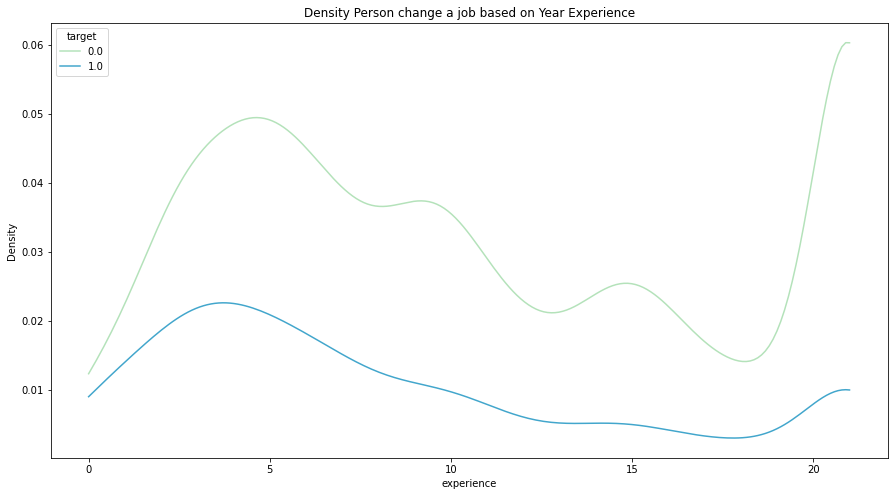

In [53]:
plt.figure(figsize=(15, 8))
sns.kdeplot(data=df, x="experience", hue="target",cut = 0,palette='GnBu')
plt.title('Density Person change a job based on Year Experience')
plt.show()

工作經驗1-5年的人想換工作的可能性更大

In [54]:
Marital = ((pd.crosstab(index= df["experience"], columns= df["target"], normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

target,0.0,1.0
experience,,
0,54.72,45.28
1,57.66,42.34
3,64.61,35.39
2,66.99,33.01
4,67.50,32.50
7,70.63,29.37
5,71.23,28.77
6,71.81,28.19
8,75.62,24.38


## 9.company_size

In [55]:
df['company_size'].value_counts()

50-99        8962
100-500      2558
10000+       2004
10/49        1469
1000-4999    1322
<10          1308
500-999       877
5000-9999     561
Name: company_size, dtype: int64

In [56]:
company_size_mapping = {'<10': 1,'10/49': 2,'50-99': 3, '100-500': 4,'500-999': 5,'1000-4999': 6,'5000-9999': 7,'10000+': 8}

In [57]:
df['company_size'] = df['company_size'].map(company_size_mapping)

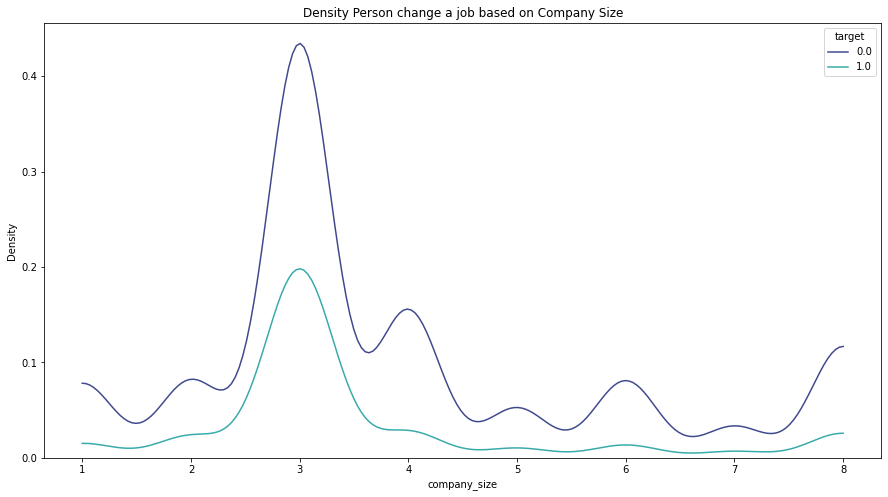

In [58]:
plt.figure(figsize=(15, 8))
sns.kdeplot(data=df, x="company_size", hue="target",cut = 0,palette='mako')
plt.title('Density Person change a job based on Company Size')
plt.show()

50-99 人的公司規模 3 級工作的人換工作的密度最高

In [59]:
Marital = ((pd.crosstab(index= df["company_size"], columns= df["target"], normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

target,0.0,1.0
company_size,,
3,67.22,32.78
2,76.58,23.42
8,80.89,19.11
7,81.82,18.18
5,82.67,17.33
1,82.87,17.13
4,83.93,16.07
6,84.87,15.13


## 10.company_type

In [60]:
df['company_type'].value_counts()

Pvt Ltd                15863
Funded Startup          1000
Public Sector            953
Early Stage Startup      603
NGO                      521
Other                    121
Name: company_type, dtype: int64

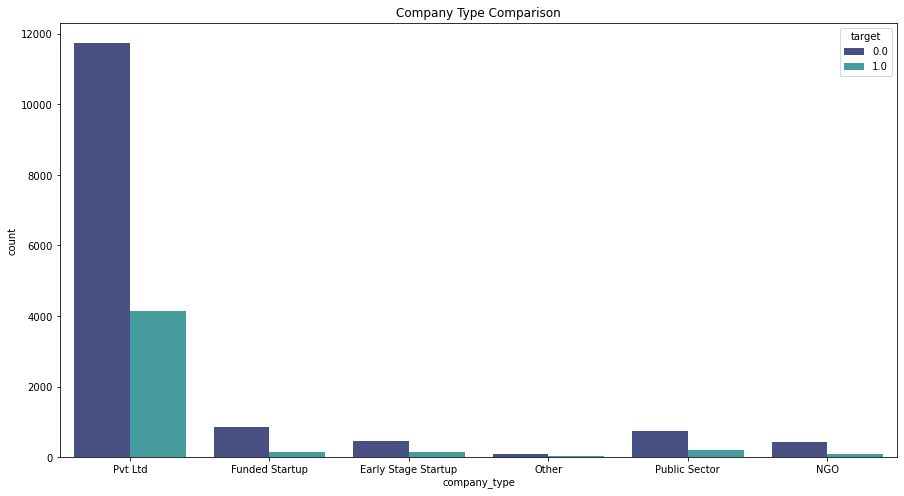

In [61]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df["company_type"],hue=df["target"], data=df, palette='mako')
plt.title('Company Type Comparison')
plt.show()

In [62]:
Marital = ((pd.crosstab(index= df["company_type"], columns= df["target"], normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

target,0.0,1.0
company_type,,
Pvt Ltd,73.93,26.07
Other,76.03,23.97
Early Stage Startup,76.45,23.55
Public Sector,77.96,22.04
NGO,81.38,18.62
Funded Startup,86.00,14.00


在私人公司工作的人換工作的人比例最高

## 11.last_new_job 

In [63]:
df['last_new_job'].value_counts()

1        8433
>4       3254
2        2887
never    2436
4        1029
3        1022
Name: last_new_job, dtype: int64

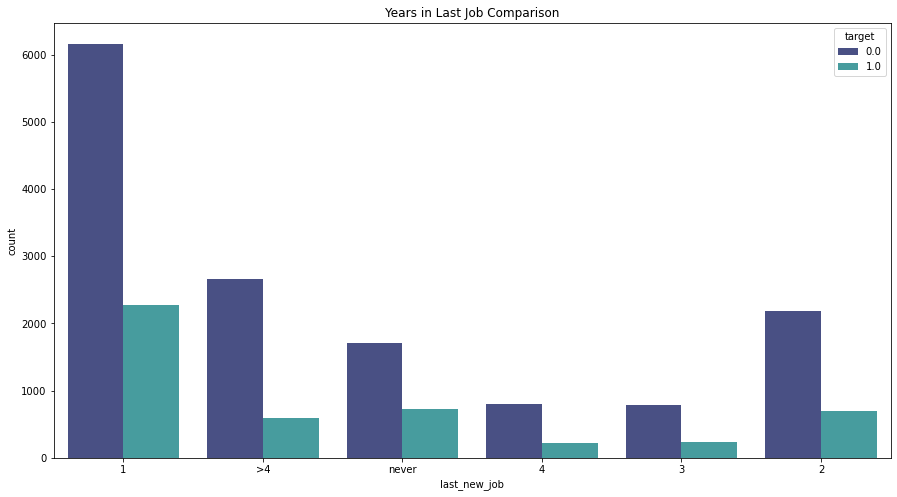

In [64]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df["last_new_job"],hue=df["target"], data=df, palette='mako')
plt.title('Years in Last Job Comparison')
plt.show()

In [65]:
Marital = ((pd.crosstab(index= df["last_new_job"], columns= df["target"], normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

target,0.0,1.0
last_new_job,,
never,69.91,30.09
1,73.06,26.94
2,75.86,24.14
3,77.59,22.41
4,77.84,22.16
>4,81.71,18.29


從未有過工作和剛畢業的人在學習完課程後往往會成為數據科學家。

## 12.training_hours 

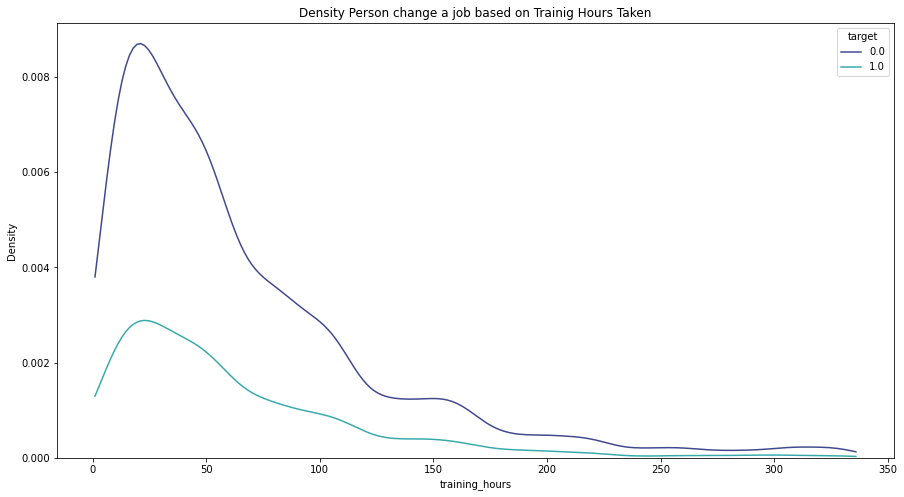

In [66]:
plt.figure(figsize=(15, 8))
sns.kdeplot(data=df, x="training_hours", hue="target",cut = 0,palette='mako')
plt.title('Density Person change a job based on Trainig Hours Taken')
plt.show()

接受長達 25 小時培訓的人，他們傾向工作轉變為數據科學家

In [67]:
#刪除不具有影響的因子-性別和學術專業
df = df.drop(columns=["gender"])
df = df.drop(columns=["major_discipline"])

In [68]:
df.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target
0,103,0.920,1,no_enrollment,Graduate,21,3,Pvt Ltd,1,36,1.0
1,40,0.776,0,no_enrollment,Graduate,15,3,Pvt Ltd,>4,47,0.0
2,21,0.624,0,Full time course,Graduate,5,3,Pvt Ltd,never,83,0.0
3,115,0.789,0,no_enrollment,Graduate,0,3,Pvt Ltd,never,52,1.0
4,162,0.767,1,no_enrollment,Masters,21,3,Funded Startup,4,8,0.0


In [69]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler,PolynomialFeatures,PowerTransformer,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [70]:
#把X和Y值標籤化且分割 20:80比例
x = df.drop(columns='target')
y = df['target']

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.80,stratify=y,random_state=42)

In [72]:
#使用機器學習分類器分析
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_curve,roc_auc_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

In [73]:
def log_evaluation(data_sample_train,data_sample_test, aktual_train,aktual_test, model):
    hasil_model_train = model.predict(data_sample_train)
    accuracy_train = accuracy_score(aktual_train, hasil_model_train)
    recall_train = recall_score(aktual_train, hasil_model_train)
    precision_train = precision_score(aktual_train, hasil_model_train)
    f1_train = f1_score(aktual_train, hasil_model_train)
    rocauc_train = roc_auc_score(aktual_train,hasil_model_train)

    hasil_model_test = model.predict(data_sample_test)
    accuracy_test = accuracy_score(aktual_test, hasil_model_test)
    recall_test = recall_score(aktual_test, hasil_model_test)
    precision_test = precision_score(aktual_test, hasil_model_test)
    f1_test = f1_score(aktual_test, hasil_model_test)
    rocauc_test = roc_auc_score(aktual_test,hasil_model_test)
    
    cm = confusion_matrix(aktual_test, hasil_model_test, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = ["akt1", "akt0"],columns=["pred 1" , "pred 0"])
    cr = classification_report(aktual_test, hasil_model_test)


    hasil_evaluation = pd.DataFrame(data= {"Training" : [accuracy_train, recall_train, precision_train,f1_train,rocauc_train],"Testing" : [accuracy_test, recall_test, precision_test,f1_test,rocauc_test]}, index=["accuracy", "recall" , "precission", "F1 Score", "ROCAUC"] )

    return hasil_model_train, hasil_model_test, hasil_evaluation, df_cm, cr

In [74]:
x.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours
0,103,0.920,1,no_enrollment,Graduate,21,3,Pvt Ltd,1,36
1,40,0.776,0,no_enrollment,Graduate,15,3,Pvt Ltd,>4,47
2,21,0.624,0,Full time course,Graduate,5,3,Pvt Ltd,never,83
3,115,0.789,0,no_enrollment,Graduate,0,3,Pvt Ltd,never,52
4,162,0.767,1,no_enrollment,Masters,21,3,Funded Startup,4,8


In [75]:
num_columns = ['city','city_development_index','relevent_experience','experience',"company_size","training_hours"]

cat_columns = ["enrolled_university", "education_level","company_type","last_new_job"]


In [76]:
#LOGISTIC REGRESSION 
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean'))
])


cat_pipeline = Pipeline([
    ('encoder',OneHotEncoder())
])



preprocessor = ColumnTransformer([
    ('numeric',num_pipeline,num_columns),
    ('categoric1',cat_pipeline,cat_columns),
 
])

Pipe_lr = Pipeline([
    ('prep',preprocessor),
    ('algo',LogisticRegression(solver='liblinear'))

])

In [77]:
Pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['city',
                                                   'city_development_index',
                                                   'relevent_experience',
                                                   'experience', 'company_size',
                                                   'training_hours']),
                                                 ('categoric1',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['enrolled_university',
                                                   'education_level',
              

In [78]:
lr_hasil_train, lr_hasil_test, lr_evaluation, lr_cm, lr_cr = log_evaluation(x_train, x_test, y_train, y_test, Pipe_lr)

In [79]:
lr_evaluation

,Training,Testing
accuracy,0.768429,0.773931
recall,0.249803,0.252366
precission,0.583538,0.613811
F1 Score,0.349843,0.357675
ROCAUC,0.595281,0.599803


In [80]:
lr_cm

,pred 1,pred 0
akt1,240,711
akt0,151,2711


In [81]:
print(lr_cr)

              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86      2862
         1.0       0.61      0.25      0.36       951

    accuracy                           0.77      3813
   macro avg       0.70      0.60      0.61      3813
weighted avg       0.75      0.77      0.74      3813



In [82]:
#SVM

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',RobustScaler())
])


cat_pipeline = Pipeline([
    ('encoder',OneHotEncoder())
])



preprocessor = ColumnTransformer([
    ('numeric',num_pipeline,num_columns),
    ('categoric1',cat_pipeline,cat_columns)
    
])

Pipe_SVC = Pipeline([
    ('prep',preprocessor),
    ('algo',SVC(max_iter=300,probability=True))

])

In [83]:
Pipe_SVC.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['city',
                                                   'city_development_index',
                                                   'relevent_experience',
                                                   'experience', 'company_size',
                                                   'training_hours']),
                                                 ('categoric1',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]

In [84]:
svm_hasil_train, svm_hasil_test, svm_evaluation, svm_cm, svm_cr = log_evaluation(x_train, x_test, y_train, y_test, Pipe_SVC)

In [85]:
svm_evaluation

,Training,Testing
accuracy,0.712684,0.710202
recall,0.443860,0.454259
precission,0.426909,0.424361
F1 Score,0.435220,0.438801
ROCAUC,0.622935,0.624753


In [86]:
svm_cm

,pred 1,pred 0
akt1,432,519
akt0,586,2276


In [87]:
print(svm_cr)

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80      2862
         1.0       0.42      0.45      0.44       951

    accuracy                           0.71      3813
   macro avg       0.62      0.62      0.62      3813
weighted avg       0.72      0.71      0.71      3813



In [88]:
#Random Forest
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean'))
])


cat_pipeline = Pipeline([
    ('encoder',OneHotEncoder())
])



preprocessor = ColumnTransformer([
    # ('Nama Instruksi',fungsinya, data yang akan dieksekusi dengan fungsi tsb)
    ('numeric',num_pipeline,num_columns),
    ('categoric1',cat_pipeline,cat_columns),
])

Pipe_rf = Pipeline([
    ('prep',preprocessor),
    ('algo',RandomForestClassifier())

])

In [89]:
Pipe_rf.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['city',
                                                   'city_development_index',
                                                   'relevent_experience',
                                                   'experience', 'company_size',
                                                   'training_hours']),
                                                 ('categoric1',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['enrolled_university',
                                                   'education_level',
              

In [90]:
rf_hasil_train, rf_hasil_test, rf_evaluation, rf_cm, rf_cr = log_evaluation(x_train, x_test, y_train, y_test, Pipe_rf)

In [91]:
rf_evaluation

,Training,Testing
accuracy,0.996918,0.770784
recall,0.991586,0.400631
precission,0.996038,0.556204
F1 Score,0.993807,0.465770
ROCAUC,0.995137,0.647206


In [92]:
rf_cm

,pred 1,pred 0
akt1,381,570
akt0,304,2558


In [93]:
print(rf_cr)

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      2862
         1.0       0.56      0.40      0.47       951

    accuracy                           0.77      3813
   macro avg       0.69      0.65      0.66      3813
weighted avg       0.75      0.77      0.76      3813



In [94]:
#XGBoost 
from xgboost import XGBClassifier
import xgboost

In [95]:

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean'))
])


cat_pipeline = Pipeline([
    ('encoder',OneHotEncoder())
])



preprocessor = ColumnTransformer([
    # ('Nama Instruksi',fungsinya, data yang akan dieksekusi dengan fungsi tsb)
    ('numeric',num_pipeline,num_columns),
    ('categoric1',cat_pipeline,cat_columns),
])

Pipe_xgb = Pipeline([
    ('prep',preprocessor),
    ('algo',XGBClassifier(eval_metric='auc'))

])

In [96]:
Pipe_xgb.fit(x_train,y_train )

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['city',
                                                   'city_development_index',
                                                   'relevent_experience',
                                                   'experience', 'company_size',
                                                   'training_hours']),
                                                 ('categoric1',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['enrolled_university',
                                                   'education_level',
              

In [97]:
xgb_hasil_train, xgb_hasil_test, xgb_evaluation, xgb_cm, xgb_cr = log_evaluation(x_train, x_test, y_train, y_test, Pipe_xgb)

In [98]:
xgb_evaluation

,Training,Testing
accuracy,0.864769,0.773931
recall,0.626874,0.411146
precission,0.787578,0.564214
F1 Score,0.698097,0.475669
ROCAUC,0.785346,0.652813


In [99]:
xgb_cm

,pred 1,pred 0
akt1,391,560
akt0,302,2560


In [100]:
print(xgb_cr)

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86      2862
         1.0       0.56      0.41      0.48       951

    accuracy                           0.77      3813
   macro avg       0.69      0.65      0.67      3813
weighted avg       0.76      0.77      0.76      3813



In [101]:
print(svm_cr)

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80      2862
         1.0       0.42      0.45      0.44       951

    accuracy                           0.71      3813
   macro avg       0.62      0.62      0.62      3813
weighted avg       0.72      0.71      0.71      3813



兩個最佳結果建模是SVM和 XG Boost